This short notebook provides a quick analysis on the data we are using to train the data model

In [1]:
import pandas as pd
import numpy as np
import os

In [47]:
# Let's look at how much data we have for training.
# We will load all the file paths, store them in a directory, so we can get a count of number of images per breed
def fileCountPerDir(dirPath):
    allFiles = []
    for subdir, dirs, files in os.walk(dirPath):
        for file in files:
            #print os.path.join(subdir, file)
            #Skip the hidden files
            if file[0] == ".":
                continue
            else:
                filepath = subdir + os.sep + file
                allFiles.append(filepath)

    df = pd.DataFrame(allFiles)
    df.columns = ["FilePath"]
    df["Directory"] = df["FilePath"].apply(lambda x: x[:x.rfind('/')])
    df["File"] = df["FilePath"].apply(lambda x: x[x.rfind('/') + 1:])
    return df

In [50]:
train_df = fileCountPerDir("dogImages/train")
train_df.head()

,FilePath,Directory,File
0,dogImages/train/001.Affenpinscher/Affenpinsche...,dogImages/train/001.Affenpinscher,Affenpinscher_00001.jpg
1,dogImages/train/001.Affenpinscher/Affenpinsche...,dogImages/train/001.Affenpinscher,Affenpinscher_00002.jpg
2,dogImages/train/001.Affenpinscher/Affenpinsche...,dogImages/train/001.Affenpinscher,Affenpinscher_00004.jpg
3,dogImages/train/001.Affenpinscher/Affenpinsche...,dogImages/train/001.Affenpinscher,Affenpinscher_00005.jpg
4,dogImages/train/001.Affenpinscher/Affenpinsche...,dogImages/train/001.Affenpinscher,Affenpinscher_00006.jpg


In [51]:
filesPerDir = pd.DataFrame(dogTrainFiles_df.groupby("Directory")["File"].count())

In [52]:
filesPerDir.head()

,File
Directory,
dogImages/train/001.Affenpinscher,64
dogImages/train/002.Afghan_hound,58
dogImages/train/003.Airedale_terrier,52
dogImages/train/004.Akita,63
dogImages/train/005.Alaskan_malamute,77


In [53]:
#Breeds that have the most training pics
filesPerDir.sort_values("File", inplace=True, ascending=False)
filesPerDir.head()

,File
Directory,
dogImages/train/005.Alaskan_malamute,77
dogImages/train/029.Border_collie,74
dogImages/train/015.Basset_hound,73
dogImages/train/057.Dalmatian,71
dogImages/train/014.Basenji,69


In [54]:
#Breeds that has the least training pics
filesPerDir.tail()

,File
Directory,
dogImages/train/133.Yorkshire_terrier,30
dogImages/train/102.Manchester_terrier,29
dogImages/train/121.Plott,28
dogImages/train/108.Norwegian_buhund,26
dogImages/train/132.Xoloitzcuintli,26


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

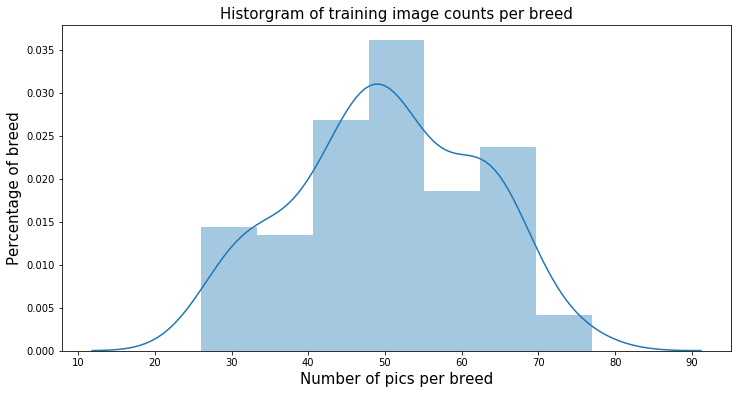

In [46]:
fig = plt.figure(figsize=(12,6))
plt.title("Historgram of training image counts per breed", fontsize=15)
plt.xlabel("Number of pics per breed", fontsize=15)
plt.ylabel("Percentage of breed", fontsize=15)
sns.distplot(filesPerDir);
